In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import os
import re


In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 '03-05-19-V118',
 'EDA.ipynb',
 'GPS Files',
 'Skytrain Linear Asset Database - Consolidated.xlsx',
 'SMC DATALOG FOR MAR. 5 TEST TRAIN 118-6.xlsx',
 'Switch Maint Works to date - April 2019.xlsx',
 'Test Train Sample Noise Data',
 'Test Train Sample Noise Data.zip']

In [3]:
home = os.getcwd()


In [4]:
os.chdir("03-05-19-V118")
os.getcwd()

'C:\\Users\\tnank\\Documents\\GitHub\\project-sturm_drang\\03-05-19-V118'

In [5]:
files = os.listdir()
csv_files = []
for n in files:
    if re.search(".csv", n):
        csv_files.append(n)

In [9]:
df = pd.read_csv(csv_files[0], header=15, names=["time", "acceleration_a"])
df.head()
df2 = pd.read_csv(csv_files[1], header=15, names=["time", "acceleration_b"])
df2.head()
raw = pd.merge(left=df, right=df2, how = "outer")

find the relationship between velocity and amplitude
then use the sections of higher quality gps signal to establish the realtionship between velocity and amplitude.

try on 20-30 second fourier transform.

try using

power spectrum/frequency analysis of each accelerometer.

clustering (historical and spacial) expect 5(ish) clusters, stoped, linear tavel, cornering, acceleration/decceleration. (curve radius)  engine/motor (also wheel constant) effects. 

silhouete

break all data files down to one particular consistent section of track

decision tree model for velocity (gps) prediction

first intergral of low frequency acceleration may give velocity.



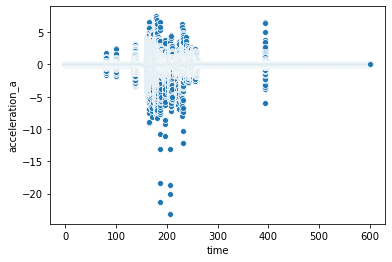

In [10]:

sb.scatterplot(x="time", y="acceleration_a", data= df.loc[df.time<600,:])

In [12]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59744256 entries, 0 to 59744255
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 1.8 GB


In [13]:
raw.describe()

,time,acceleration_a,acceleration_b
count,5.974426e+07,5.974426e+07,5.974426e+07
mean,5.834400e+03,-4.753257e-07,-2.379909e-06
std,3.368492e+03,1.943521e+00,1.777598e+00
min,0.000000e+00,-2.454301e+02,-2.871722e+02
25%,2.917200e+03,-2.410161e-01,-2.312341e-01
50%,5.834400e+03,1.924367e-04,1.500675e-04
75%,8.751600e+03,2.614650e-01,2.489711e-01
max,1.166880e+04,9.579732e+01,1.615189e+02


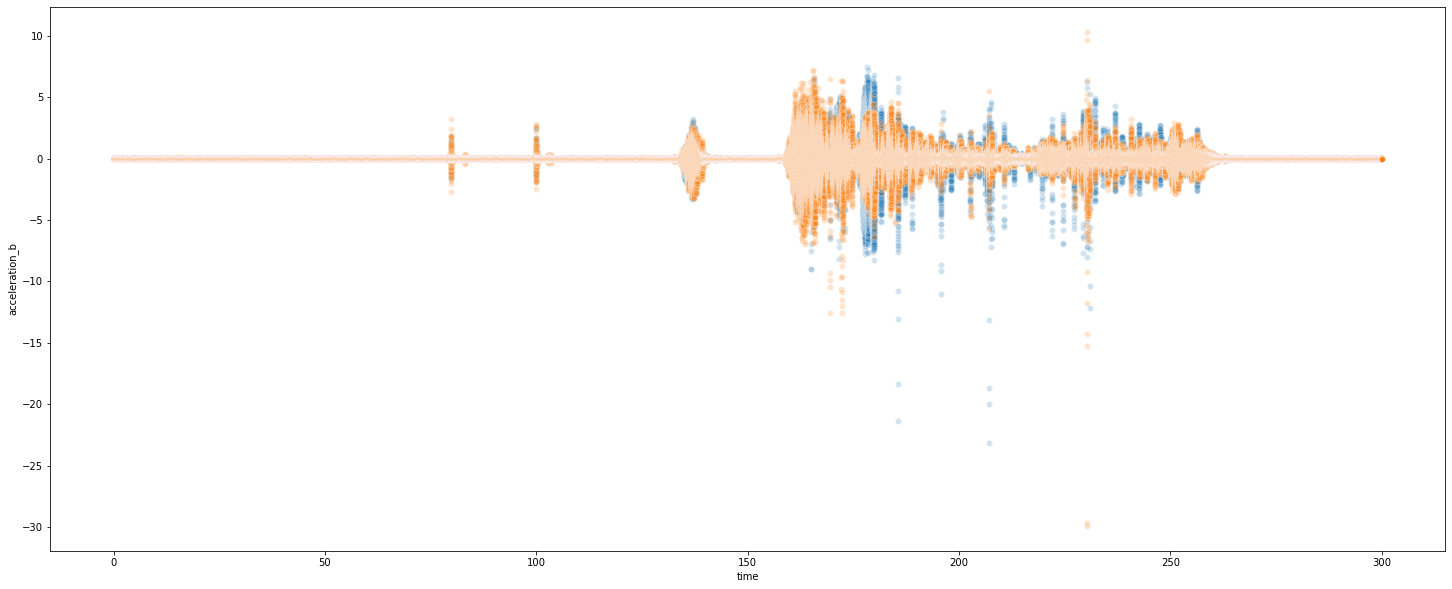

In [28]:
plt.figure(figsize=(25,10))
sb.scatterplot(x="time", y="acceleration_a", data = raw.loc[raw.time<300,:], alpha=0.2)
sb.scatterplot(x="time", y="acceleration_b", data = raw.loc[raw.time<300,:], alpha=0.2)
plt.show()

take first 25 mins for saftey then identify terminus 
abreviate to stoped in yard to stopped in terminus


In [39]:
safe_len =60*25
dev = raw.loc[raw.time<safe_len,:]

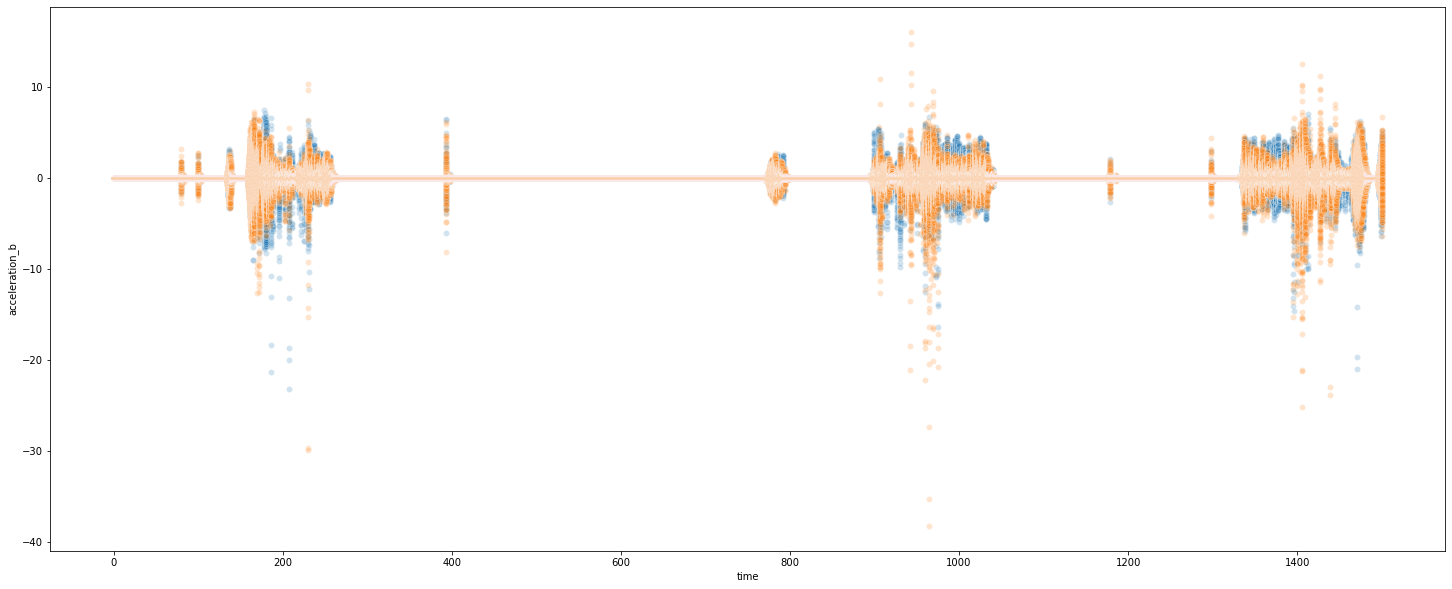

In [40]:
plt.figure(figsize=(25,10))
sb.scatterplot(x="time", y="acceleration_a", data = dev, alpha=0.2)
sb.scatterplot(x="time", y="acceleration_b", data = dev, alpha=0.2)
plt.show()

In [41]:
safe_len

1500

In [42]:
safe_len/60


25.0

In [43]:
dev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7680000 entries, 0 to 7679999
Data columns (total 3 columns):
 #   Column          Dtype  
---  ------          -----  
 0   time            float64
 1   acceleration_a  float64
 2   acceleration_b  float64
dtypes: float64(3)
memory usage: 234.4 MB


In [44]:
dev["abs_a"] = dev.acceleration_a.abs()
dev["abs_b"] = dev.acceleration_b.abs()
dev.describe()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,time,acceleration_a,acceleration_b,abs_a,abs_b
count,7.680000e+06,7.680000e+06,7.680000e+06,7.680000e+06,7.680000e+06
mean,7.499999e+02,-1.510756e-07,-1.553050e-05,9.601767e-02,9.016995e-02
std,4.330127e+02,2.987497e-01,2.839567e-01,2.828993e-01,2.692597e-01
min,0.000000e+00,-2.313393e+01,-3.825788e+01,0.000000e+00,0.000000e+00
25%,3.750000e+02,-8.651454e-03,-7.740470e-03,3.770675e-03,3.357195e-03
50%,7.499999e+02,-3.700277e-05,-4.702229e-05,8.571115e-03,7.637166e-03
75%,1.125000e+03,8.491754e-03,7.534840e-03,3.808473e-02,3.521621e-02
max,1.500000e+03,7.445345e+00,1.607012e+01,2.313393e+01,3.825788e+01


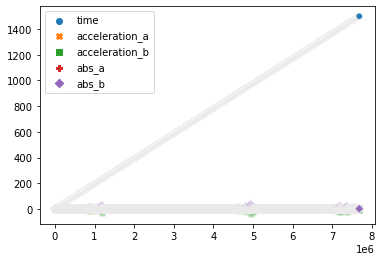

In [45]:
sb.scatterplot(data=dev, alpha=.2)